<a href="https://colab.research.google.com/github/xuhu357/DataAnalysis/blob/master/ch02_%EC%82%AC%EB%A1%80%EC%86%8C%EA%B0%9C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 지난 사례에서 영화리뷰에 대해서 분석해보았고, 그럼 이번에는 이름에 대해서 분석해보자

분석할 내용: (미국 사회보장국에서 제공한 신생아 이름 정보)


1.   시대별로 특정 이름이 차지하는 비율로부터, 얼마나 흔한 이름인지 알아볼수 있다.
2.   이름의 상대 순위 알아보기
3.   각 연도별 가장 인기 있는 이름, 가장 빈도가 높거나 낮은 이름 알아보기
4.   모음, 자음, 길이, 전반적인 다양성, 철자 변화, 첫 글자와 마지막 글자 등, 이름 유행 분석하기
5.   성서에서 등장하는 이름, 유명인, 인구 통계학적 변화 등 외부 자료를 통한 유행 분석하기

지금까지 사용했던 라이브러를 이용해서, 위의 분석은 쉽게 할 수 있다. 


**그럼 Let's Go~!!!**



### 일단 분석할 파일부터 준비하자.

데이터가 없다면, 사회 보장국 웹페이지에서 구할 수 있다. 
http://www.ssa.gov/oact/babynames/limits.html


다운로드 받았다고 치고, 일단 로컬에 있는 데이터를 업로드하고 열어보자.

In [1]:
# 로컬로부터 일단 파일을 업로드 해놓자
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving yob1880.txt to yob1880.txt
User uploaded file "yob1880.txt" with length 24933 bytes


당연하겠지만, yob1880.txt 파일은 올라가 있다.  

In [2]:
!ls

sample_data  yob1880.txt


In [0]:
file_name = 'yob1880.txt'

In [10]:
!head -n 10 file_name

head: cannot open 'file_name' for reading: No such file or directory


헐~, 뭐지? 분명이 ls 명령어로 확인했는데~음. 그럼 파일 이름을 변수에 담지 말고 그대로 입력하자 

In [9]:
!head -n 10 yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


유닉스의 head명령어에 '' 이 부호가 들어가서 안되는거였구나, 하긴 보통 command 창에서는 ' 부호를 넣지 않긴하지, 프로그래밍하고 헷갈렸쓰~


---


보셨겠지만 각 라인은 ','로 구분되어 있음, 그 말인즉 csv 형식으로 볼수 있다는 말~

그럼 pandas read_csv로 쉽게 불러올 수 있음.

In [0]:
# 일단 라이브러리부터 import 하자
import pandas as pd


In [0]:
names1880 = pd.read_csv(file_name, names=['name', 'sex', 'births'])

In [14]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


???? 여자밖에 없는데, 남자는 어딧지? 전체 데이터를 한번  보자


In [0]:
names1880

이 데이터는 각 연도별로 최소 5명 이상 중복되는 이름만 포함하고 있다. 

편의상 성별 출생수를 모두 합한 값을 해당 연도의 전체 출생수라고 가정

---

즉 이 연도에 남자 ?명, 여자 ?명 태여났는지 확인 해보자

In [18]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

### 본격적으로 분석을 시작하자. 

현재까지는 1880년의 데이터만 보았는데, 실제로는 1880~2010년까지의 데이터를 모두 업로드하고, 전체에 대해서 분석하자

In [19]:
# 로컬로부터 일단 파일을 업로드 해놓자
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving yob1881.txt to yob1881.txt
Saving yob1882.txt to yob1882.txt
Saving yob1883.txt to yob1883.txt
Saving yob1884.txt to yob1884.txt
Saving yob1885.txt to yob1885.txt
Saving yob1886.txt to yob1886.txt
Saving yob1887.txt to yob1887.txt
Saving yob1888.txt to yob1888.txt
Saving yob1889.txt to yob1889.txt
Saving yob1890.txt to yob1890.txt
Saving yob1891.txt to yob1891.txt
Saving yob1892.txt to yob1892.txt
Saving yob1893.txt to yob1893.txt
Saving yob1894.txt to yob1894.txt
Saving yob1895.txt to yob1895.txt
Saving yob1896.txt to yob1896.txt
Saving yob1897.txt to yob1897.txt
Saving yob1898.txt to yob1898.txt
Saving yob1899.txt to yob1899.txt
Saving yob1900.txt to yob1900.txt
Saving yob1901.txt to yob1901.txt
Saving yob1902.txt to yob1902.txt
Saving yob1903.txt to yob1903.txt
Saving yob1904.txt to yob1904.txt
Saving yob1905.txt to yob1905.txt
Saving yob1906.txt to yob1906.txt
Saving yob1907.txt to yob1907.txt
Saving yob1908.txt to yob1908.txt
Saving yob1909.txt to yob1909.txt
Saving yob1910

현재는 자료가 연도별로 나누어져 있는데, 이들을 DataFrame 하나로 취합한후 year항목을 추가하자. 


합치는것은 pandas.concat를 이용하면 이 작업을 쉽게 할 수 있다.

In [0]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
  path = 'yob%d.txt' % year
  frame = pd.read_csv(path, names=columns)
  
  frame['year'] = year
  pieces.append(frame)
  
names = pd.concat(pieces, ignore_index=True)


### 여기서 잠깐~

concat()는 DataFrame 객체를 이어붙여주는 역할을 함.


ignore_index는 우리가 read_csv를 통해서 읽어온 원래 행의 순서를 몰라도 됨으로 index를 ignore하겠다는 뜻임~

In [21]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


이제는 groupby() 나 pivot_table() 메소드를 사용해서 연도나 성별에 따른 데이터를 수집할 수 있음~

groupby() 전에 한번 구경해보았고, 이번에는 그럼 pivot_table()을 사용해보자~

In [0]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [23]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


음~~

각 년도별, Female, Male 출생수구하는 것임. 

tail()은 head() 와 비슷하지만, 마지막 몇개를 보여주는 함수구나~

---

그림으로 한번 볼까?

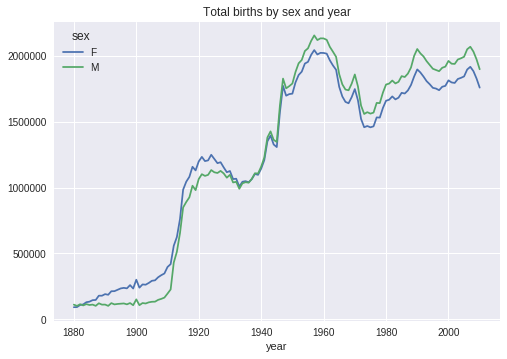

In [24]:
total_births.plot(title='Total births by sex and year')

이번에 해볼 일은, dataframe에 prop라는 열을 추가해서,  각 이름이 전체 출생수에서 차지하는 비율이 얼마인지를 계산하는것임.

In [0]:
def add_prop(group):
  births = group.births.astype(float)
  group['prop'] = births / births.sum()
  return group

In [0]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [28]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


Wow~!!! Bravo~!!!

그런데, 모든 prop의 합이 1이 맞음? 맞겠지~~근데 어떻게 확인하지?
다행히, 이런 sanity check를 해줄수 있는 함수가 있다. 

바로 np.allclose() 하는 함수~let's do it~

In [0]:
import numpy as np

In [30]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

오케이 이렇게 하면, **모든 준비는 거의 끝났다고 볼수 있음**.

이젠 본격적인 분석 작업에 들어가자~

데이터가 너무 크니, 일단 각 연도별, 성별에 따른 빈도수가 가장 높은 이름 1000개를 추출하자.


In [0]:
def get_top1000(group):
  return group.sort_values(by='births', ascending=False)[:1000]

In [0]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [41]:
len(top1000)

261877

In [42]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### How?
어떻게 이런 결과지? 1000개씩 뽑는다며???

연도수: (2010-1880+1) = 131
성별: F, M 두개씩 
각각: 1000개
1000 * 2 * 131 = 262,000

이중에서, 어떤 것은 1000개 미만일수도 있으니, 약 261877이란 결과가 나왔을 것 같음~

### 1) 이름 유행 분석

In [0]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

연도별로 John이나, Mary라는 이름의 추이를 간단하게 그래프로 만들어보자

그러기 위해서는, 연도와 이름에 대한 전체 출생수를 pivot table로 만들어보자.

In [0]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [45]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [46]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


'John', 'Harry', 'Mary', 'Marilyn' 등 일부 이름의 추세만 보고 싶다면, 

In [0]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bf183e630>,
      dtype=object)

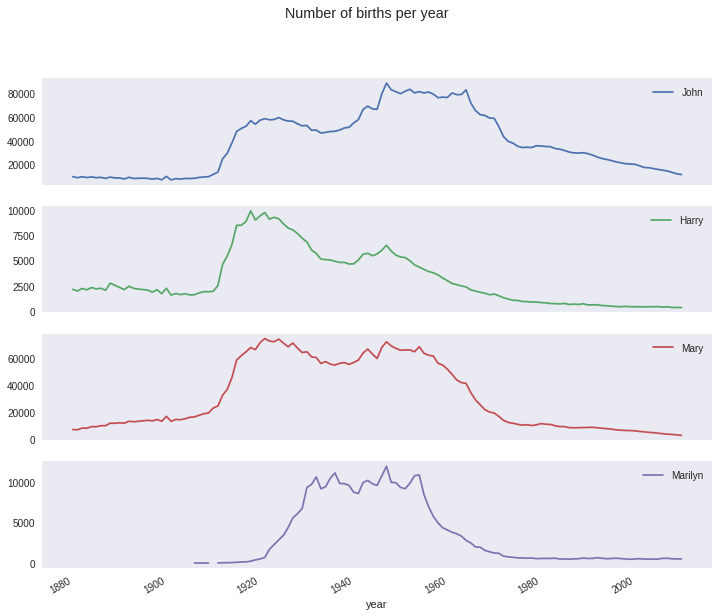

In [48]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')

**깜짝 질문: **

위의 그래프로 부터 어떤 결론을 얻을수 있을까?

(힌트: avoid, )

#### 다양한 이름을 사용하는 경향 파악하기

In [0]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

위의 조작은 뭘 확인하는걸까요?

In [50]:
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


답은, 인기있는 top 1000개의 이름이 전체 출생수에서 차지하는 비율이 얼마 되는가를 확인 하는 것임.

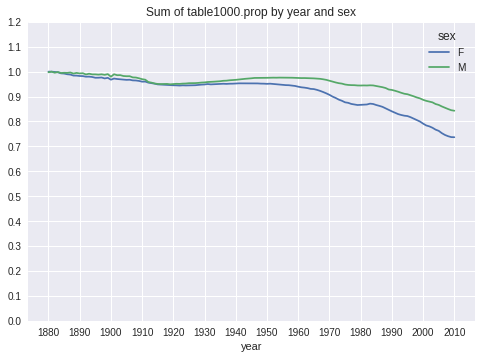

In [51]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

**Can you get something? **

top1000 이름들이 전체 출생수에서 차지하는 비율이 줄어드는것을 알수 있음. 
그 말인즉 부모들이 흔한 이름은 피해서 이름을 짓는다는 것을 의미함. 

**다른 말로 하면, **

이름의 다양성이 높아진다는 말임.


In [0]:
df = boys[boys.year == 2010]

In [0]:
df

또 인기 있는 이름순으로 정렬했을 때, 전체 출생수의 50%를 차지하기까지 등장하는 이름의 개수도 한번 보자~

In [0]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [55]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [56]:
prop_cumsum.values.searchsorted(0.5)

116

In [0]:
df = boys[boys.year == 1900]

In [0]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [61]:
in1900.values.searchsorted(0.5)+1

25

해석해보자면, 

1900년에는 상위 25개의 이름이 전체 출생아 이름의 50%를 차지했던 방면에
2010년에는 상위 117개의 이름이 전체 출생아 이름의 50%를 차지했다. 

그 말인즉, 
2010년에는 1900년보다 남자이름이 더 다양해졌다는 뜻이다~!!


#### 그럼 이 연산을 각 연도와 성별 조합에 적용해보자~

In [0]:
def get_quantile_count(group, q=0.5):
  group = group.sort_values(by='prop', ascending=False)
  return group.prop.cumsum().values.searchsorted(q) + 1

In [0]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [64]:
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
      M       15
1883  F       39
      M       15
1884  F       39
      M       16
1885  F       40
      M       16
1886  F       41
      M       16
1887  F       41
      M       17
1888  F       42
      M       17
1889  F       43
      M       18
1890  F       44
      M       19
1891  F       44
      M       20
1892  F       44
      M       20
1893  F       44
      M       21
1894  F       45
      M       22
            ... 
1996  F      122
      M       64
1997  F      129
      M       67
1998  F      138
      M       70
1999  F      146
      M       73
2000  F      155
      M       77
2001  F      164
      M       81
2002  F      170
      M       83
2003  F      178
      M       87
2004  F      191
      M       92
2005  F      199
      M       96
2006  F      209
      M       99
2007  F      223
      M      103
2008  F      234
      M      109
2009  F      241
    

거 참, Not Bad 인데, 좀 만 더 이쁘게 표현해보자~


In [0]:
diversity = diversity.unstack('sex')

In [67]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


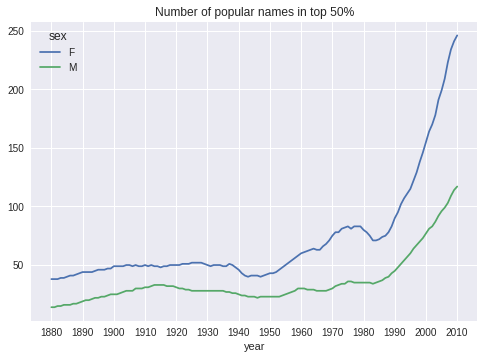

In [69]:
diversity.plot(title='Number of popular names in top 50%', xticks=range(1880, 2020, 10))

**What do you Get from this Chart?**



1.   여자 이름은 항상 남자 이름보다 다양하다
2.   시간이 흐를수록 더욱 다양해지고 있다. 남녀불문



### 마지막 글자의 변화

2007년 아이 이름을 연구하는 Laura Wattenberg는 지난 100년동안 남자아이 이름의 마지막 글자 분포에 중요한 변화가 있었다고 발표함. 

어떤 변화가 있었을까?


In [70]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [0]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)

In [0]:
last_letters

In [0]:
last_letters.name = 'last_letter'

In [74]:
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

In [0]:
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [76]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
f                NaN      NaN      NaN    ...       1758.0    1817.0   
g               25.0     44.0     28.0    ...       2151.0    2084.0   
h             7141.0   8630.0   8826.0    ...      85959.0   88085.0   
i              105.0    141.0    134.0    ...      20980.0   23610.0   
j                NaN      NaN      NaN    ...       1069.0    1088.0   
k               19.0     21.0     22.0    ...      42477.0   42043.0   
l             6175.0   7900.0   8395.0    ...     153648.0  153493.0   
m               90.0    123.0    137.0    ...      41967.0   42663.0   
n             5512.0   6833.0   7103.0    ...     616099.0  630322.0   
o               97.0    134.0    142.0    ...      82146.0   83180.0   
p                NaN      NaN      NaN    ...       3419.0    3157.0   
q                NaN      NaN      NaN    ...        602.0     618.0   
r              910.0   1207.0   1214.0    ...     165377.0  164821.0   
s             2803.0   3582.0   3569.0    ...     143791.0  139595.0   
t             3140.0   3816.0   3784.0    ...      47688.0   44991.0   
u              476.0    541.0    469.0    ...       1833.0    1819.0   
v        

In [0]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [78]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [79]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [0]:
letter_prop = subtable / subtable.sum().astype(float)

In [81]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

In [0]:
import matplotlib.pyplot as plt


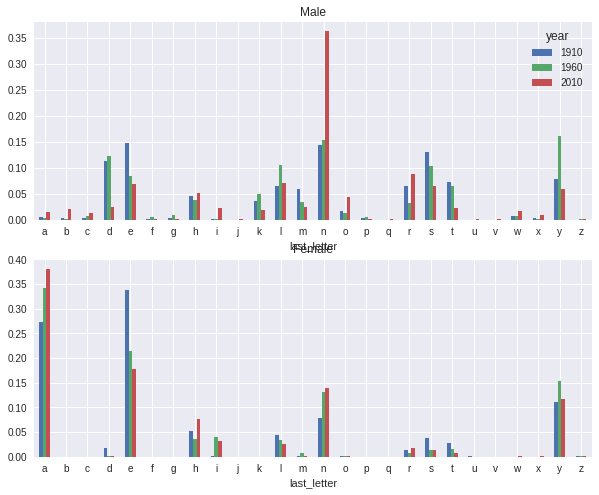

In [84]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax= axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

보다싶이, n으로 끝나는 이름이 1960년 이후, 급격히 늘어남을 알수 있다. 

---

전체 자료에서 출생연도와 성별로 다시 정규화 하고, 남자아이 이름에서 몇글자를 선택하여 이름을 열로 하는 시계열 데이터로 변환해보자

In [85]:
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37825.0   38650.0   36838.0   36156.0   34654.0   32901.0   
b             48065.0   45914.0   43144.0   42600.0   42123.0   39945.0   
c             27697.0   26778.0   26078.0   26635.0   26864.0   25318.0   
d             53391.0   51754.0   50670.0   51410.0   50595.0   47910.0   
e            144769.0  142098.0  141123.0  142999.0  143698.0  140966.0   

sex                              
year             2009      2010  
last_letter                      
a             31430.0   28438.0  
b             38862.0   38859.0  
c             24048.0   23125.0  
d             46172.0   44398.0  
e            135496.0  129012.0  

[5 rows x 262 columns]

In [0]:
letter_prop = table / table.sum().astype(float)

In [0]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [90]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


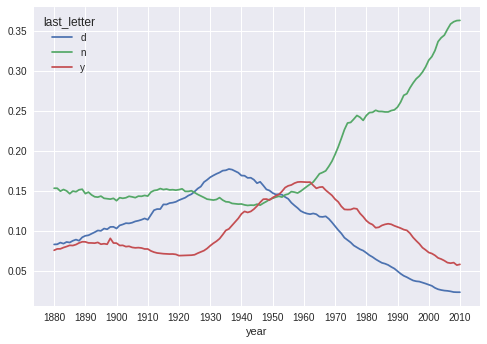

In [92]:
dny_ts.plot(xticks=range(1880, 2020, 10))

### 남자 이름과 여자 이름이 바뀐 경우

예전에는 남자 이름으로 선호되다가, 현재는 여자 이름으로 선호되는 경향이 두으러 진다는 것~
Lesley 또는 Leslie라는 이름 처럼.

top1000에서 lesl이 포함되는 이름이 포함되는 리스트를 만들어보자.  

In [0]:
all_names = top1000.name.unique()

In [0]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [0]:
lesley_like = all_names[mask]

In [96]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [0]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [98]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [0]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [0]:
table = table.div(table.sum(1), axis=0)

In [102]:
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [108]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


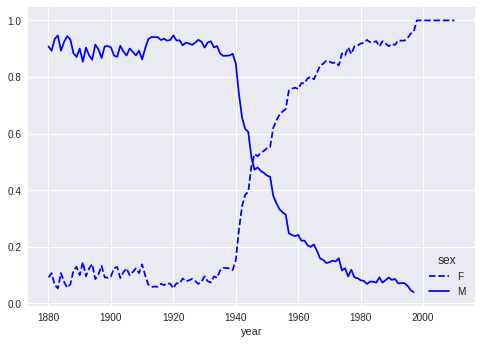

In [110]:
table.plot(style={'M': 'b-', 'F':'b--'})

## Summary

지금까지 파이썬의 여러도구를 이용해서 어떤일을 할수 있는지를 보았고, 

느낀점은, 모르고 있었던 함수들이 참 많구나~

알면 아주 유용한 내용이 많음을 느꼈다. 